# Libraries

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

# Load & Pre-processing

In [2]:
#path directory to images
train='train'
test='test'
val = "validation"

img_size=[224, 224]
batch_size=3
no_epochs=10
lr=0.001
no_classes=3

In [3]:
import os

classes=os.listdir(train)
no_classes=len(classes)
print("Class {} \nLength is: {}".format(classes, no_classes))

Class ['Covid', 'Normal', 'Viral Pneumonia'] 
Length is: 3


In [4]:
#image data augmentation
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

training_set=train_datagen.flow_from_directory(
    directory=train,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

Found 249 images belonging to 3 classes.


In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)

test_set=test_datagen.flow_from_directory(
    directory=test,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

Found 65 images belonging to 3 classes.


# Choosing Model

In [6]:
# Using VGG16 for modeling
vgg = VGG16(input_shape=img_size+[3], weights='imagenet', include_top=False)

In [7]:
for layer in vgg.layers:
    layer.trainable=False
    
x=Flatten()(vgg.output)

prediction=Dense(no_classes, activation='softmax')(x)

In [8]:
model=Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
# Compiling the model
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

# Training

In [10]:
history=model.fit(
    training_set, 
    validation_data=test_set, 
    epochs=10,
    steps_per_epoch=len(training_set), #steps per epoch is 8
    validation_steps=len(test_set)) # validation steps is 3

Epoch 1/10
83/83 [==============================] - 22s 200ms/step - loss: 0.3464 - accuracy: 0.7831 - val_loss: 0.2991 - val_accuracy: 0.8462
Epoch 2/10
83/83 [==============================] - 13s 159ms/step - loss: 0.1714 - accuracy: 0.9116 - val_loss: 0.1786 - val_accuracy: 0.8923
Epoch 3/10
83/83 [==============================] - 13s 155ms/step - loss: 0.1264 - accuracy: 0.9438 - val_loss: 0.1623 - val_accuracy: 0.9077
Epoch 4/10
83/83 [==============================] - 13s 161ms/step - loss: 0.0648 - accuracy: 0.9799 - val_loss: 0.0978 - val_accuracy: 0.9692
Epoch 5/10
83/83 [==============================] - 13s 157ms/step - loss: 0.0542 - accuracy: 0.9880 - val_loss: 0.1060 - val_accuracy: 0.9538
Epoch 6/10
83/83 [==============================] - 14s 165ms/step - loss: 0.0855 - accuracy: 0.9639 - val_loss: 0.1456 - val_accuracy: 0.9385
Epoch 7/10
83/83 [==============================] - 14s 168ms/step - loss: 0.0582 - accuracy: 0.9799 - val_loss: 0.0877 - val_accuracy: 0.9538

# Evaluation

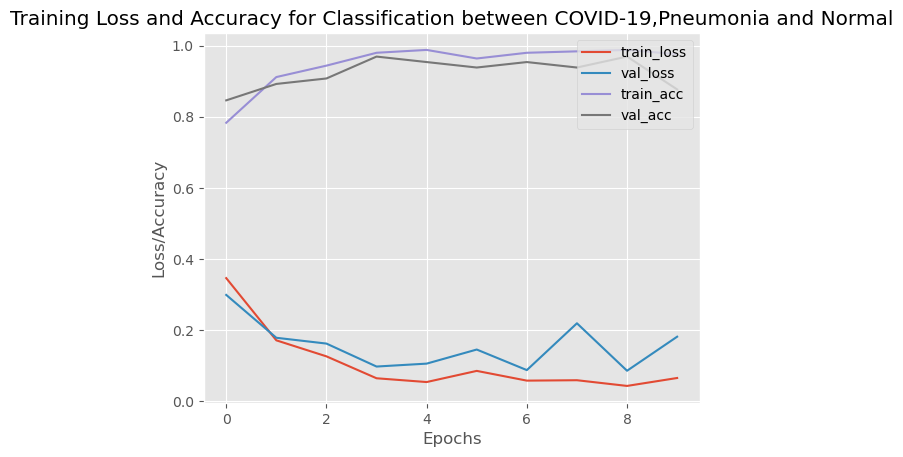

In [11]:
model.save('Model.h5')

#loss & accuracy graph
n=no_epochs
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, n), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, n), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy for Classification between COVID-19,Pneumonia and Normal")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

In [12]:
# Check test accuacy & loss
modelLoss, modelAccuracy=model.evaluate(test_set, verbose=0)

print('Test Accuracy is: {:.2f}%'.format(modelAccuracy *100))
print('Test Loss is:     {:.2f}%'.format(modelLoss *100))

Test Accuracy is: 87.69%
Test Loss is:     18.17%


# Prediction

1/1 [==============================] - 0s 20ms/step


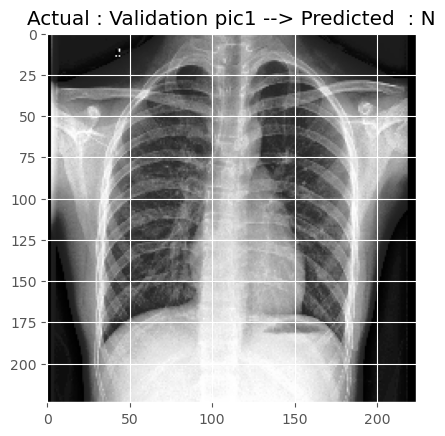

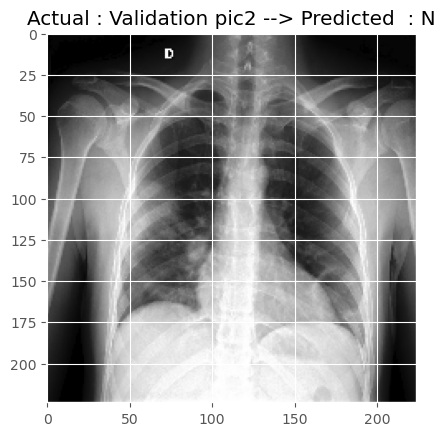

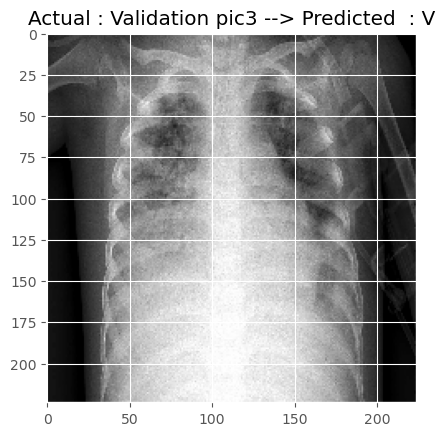

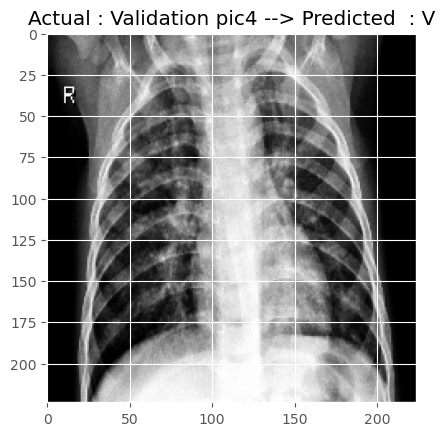

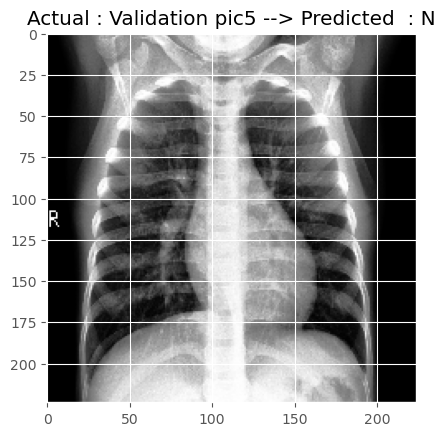

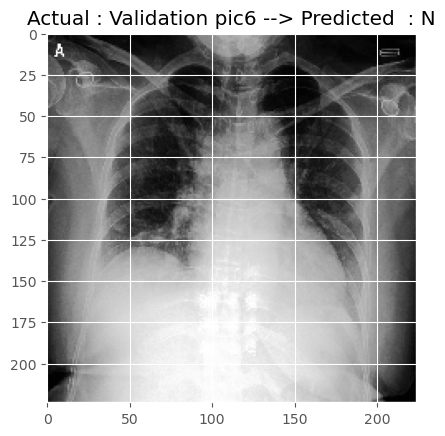

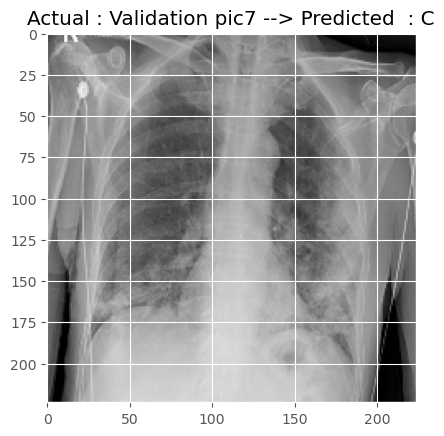

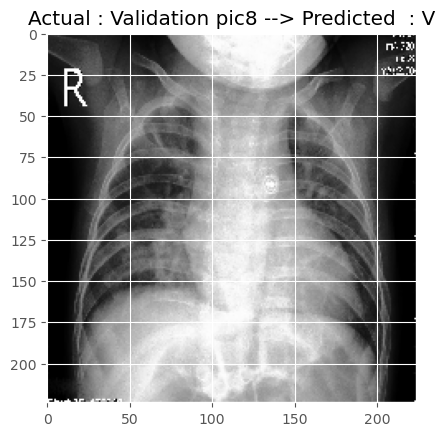

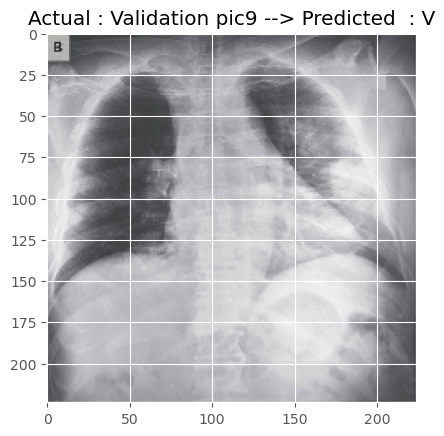

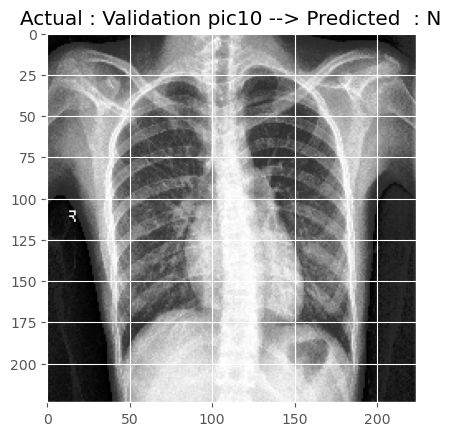

In [13]:
#loading the model
from tensorflow import keras
model=keras.models.load_model('Model.h5')

#get sample image to test
img_val1=image.load_img(r'validation/pic1.jpeg', target_size=(224, 224))
img_val2=image.load_img(r'validation/pic2.jpeg', target_size=(224, 224))
img_val3=image.load_img(r'validation/pic3.jpeg', target_size=(224, 224))
img_val4=image.load_img(r'validation/pic4.jpeg', target_size=(224, 224))
img_val5=image.load_img(r'validation/pic5.jpeg', target_size=(224, 224))
img_val6=image.load_img(r'validation/pic6.jpeg', target_size=(224, 224))
img_val7=image.load_img(r'validation/pic7.jpg', target_size=(224, 224))
img_val8=image.load_img(r'validation/pic8.jpeg', target_size=(224, 224))
img_val9=image.load_img(r'validation/pic9.jpeg', target_size=(224, 224))
img_val10=image.load_img(r'validation/pic10.jpeg', target_size=(224, 224))

def model_predict(img, actual):
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    x_processed=preprocess_input(x)
    result=model.predict(x_processed)
    index = np.argmax(result,axis=1)
    if index==0:
       result="C" # C = CoVid-19
    elif index==1:
       result="N" # N = Normal
    else:
       result="V" # V = Viral Pneumonia

    plt.figure()
    plt.imshow(img)
    plt.title('Actual : {} --> Predicted  : {}'.format(actual, result))
    
pred_val1=model_predict(img_val1, "Validation pic1")
pred_val2=model_predict(img_val2, "Validation pic2")
pred_val3=model_predict(img_val3, "Validation pic3")
pred_val4=model_predict(img_val4, "Validation pic4")
pred_val5=model_predict(img_val5, "Validation pic5")
pred_val6=model_predict(img_val6, "Validation pic6")
pred_val7=model_predict(img_val7, "Validation pic7")
pred_val8=model_predict(img_val8, "Validation pic8")
pred_val9=model_predict(img_val9, "Validation pic9")
pred_val10=model_predict(img_val10, "Validation pic10")